# TRANSICI√ìN ENERG√âTICA JUSTA EN COLOMBIA

## AJUSTES INICIALES

### Habilitar Drive

In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importar librer√≠as

In [ ]:
# @title
# Instalar ipywidgets si es necesario
!pip install -q ipywidgets

import sqlite3
import pandas as pd
import os
import gdown
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from google.colab import files
import plotly.express as px
from io import BytesIO
from PIL import Image as PILImage
from IPython.display import Image as IPImage


### Limpiar archivos temporales .csv y .db en /content/

In [ ]:
# Limpiar archivos temporales .csv y .db en /content/
!rm -f /content/*.csv /content/*.db
print("‚úÖ Archivos .csv y .db eliminados de /content/ (sin afectar Google Drive).")
!ls -lh /content/

‚úÖ Archivos .csv y .db eliminados de /content/ (sin afectar Google Drive).
total 8.0K
drwx------ 7 root root 4.0K Jun 11 04:12 drive
drwxr-xr-x 1 root root 4.0K Jun  9 13:37 sample_data


### Acceder a la base datos analisis_energetico

In [ ]:
# ID del arhivo analisis_energico.db compartido
file_id = '1JtbBy7hJe2bpTEurCD7oRdpvfkcNPsz6'
output = 'analisis_energetico.db'

# Descarga el archivo analisis_energetico.db que esta alojado en Google Drive
print(f'"\n‚ÑπÔ∏è Se descargar√° la base de datos {output} desde drive para trabajar localmente con ella:\n')
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Confirmaci√≥n de descarga exitosa
print(f'"\n\n‚úÖ Archivo {output} descargado exitosamente')

# Conecta la base de datos descargada analisis_energetico ya temporal en content
print("\n‚è≥ Conectando a la base de datos:", output )
conn = sqlite3.connect(output)

# Intentar conectar a la base de datos
try:
    conn = sqlite3.connect(output)
    print("\n‚úÖ Conexi√≥n exitosa a la base de datos: \033[1m" + output + "\033[0m")
except Exception as e:
    print("\n‚ùå Error al conectar a la base de datos:", e)


"
‚ÑπÔ∏è Se descargar√° la base de datos analisis_energetico.db desde drive para trabajar localmente con ella:



Downloading...
From: https://drive.google.com/uc?id=1JtbBy7hJe2bpTEurCD7oRdpvfkcNPsz6
To: /content/analisis_energetico.db
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48.3M/48.3M [00:00<00:00, 91.0MB/s]

"

‚úÖ Archivo analisis_energetico.db descargado exitosamente

‚è≥ Conectando a la base de datos: analisis_energetico.db

‚úÖ Conexi√≥n exitosa a la base de datos: analisis_energetico.db


### Visualizaci√≥n de las tablas presentes en la base de datos creada analisis_energetico.db

In [ ]:
# @title
# Listar tablas
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

print("üìã Tablas disponibles en la base de datos descargada:\n")
print("\n".join([f"{i+1}. {name}" for i, name in enumerate(tables['name'].tolist())]))

üìã Tablas disponibles en la base de datos descargada:

1. GDP by Country 1999-2022_LONG
2. world_country_latitude_and_longitude_values
3. International Energy Agency - CO2 emissions by sector in Colombia
4. International Energy Agency - CO2 emissions from fuel combustion, Colombia
5. International Energy Agency - electricity final consumption by sector in Colombia
6. International Energy Agency - Electricity generation from coal, Colombia
7. International Energy Agency - Electricity generation from gas, Colombia
8. International Energy Agency - Emissions from coal, Colombia
9. Monthly_Electricity_Statistics
10. poblaci√≥n_paises_por_a√±o_unpivoted
11. International Energy Agency - transport total final consumption by source in Colombia
12. International Energy Agency - Natural gas supply, Colombia
13. International Energy Agency - residential total final consumption by source in Colombia
14. International Energy Agency - industry total final consumption by source in Colombia
15. Inte

## AN√ÅLISIS EXPLORATORIO DE LOS DATOS

### Ver tipos de datos de las tablas

In [ ]:
# @title
# Obtener los nombres de las tablas
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# Recorrer cada tabla y mostrar el .info()
for table in tables:
    print(f"\nüìÑ Informaci√≥n de la tabla: {table}\n{'-'*50}")
    # Enclose the table name in double quotes to handle special characters
    df = pd.read_sql_query(f"SELECT * FROM \"{table}\";", conn)
    df.info()  # Muestra el resumen con tipos y conteos
    print(f"\n{'-'*100}\n")


üìÑ Informaci√≥n de la tabla: GDP by Country 1999-2022_LONG
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  4140 non-null   object
 1   Year     4140 non-null   int64 
 2   GDP      4140 non-null   object
dtypes: int64(1), object(2)
memory usage: 97.2+ KB

----------------------------------------------------------------------------------------------------


üìÑ Informaci√≥n de la tabla: world_country_latitude_and_longitude_values
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  245 non-null    object 
 1   latitude      245 non-null    float64
 2   longitude     245 non-null    floa

### Estad√≠sticas descriptivas

In [ ]:
# @title
# Recorrer cada tabla y mostrar estad√≠sticas descriptivas
for table_name in tables:
    print(f"\nüîç Estad√≠sticas descriptivas para la tabla: {table_name}\n")

    # Leer la tabla completa
    df = pd.read_sql_query(f"SELECT * FROM '{table_name}'", conn)

    # Mostrar estad√≠sticas descriptivas
    print(df.describe(include='all'))

    # L√≠nea divisoria para separar resultados
    print("-" * 80)


üîç Estad√≠sticas descriptivas para la tabla: GDP by Country 1999-2022_LONG

                      Country         Year   GDP
count                    4140  4140.000000  4140
unique                    180          NaN  3849
top     Afghanistan, Rep. of.          NaN     0
freq                       23          NaN   123
mean                      NaN  2010.478261   NaN
std                       NaN     7.071120   NaN
min                       NaN  1999.000000   NaN
25%                       NaN  2004.000000   NaN
50%                       NaN  2010.000000   NaN
75%                       NaN  2017.000000   NaN
max                       NaN  2022.000000   NaN
--------------------------------------------------------------------------------

üîç Estad√≠sticas descriptivas para la tabla: world_country_latitude_and_longitude_values

       country_code    latitude   longitude  country
count           245  245.000000  245.000000      245
unique          245         NaN         NaN      245


### Resumen de nulos de las tablas

In [ ]:
# @title
# 2Ô∏è‚É£ Obtener nombres de todas las tablas
tablas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# 3Ô∏è‚É£ Verificar nulos por tabla
resumen_nulos = []

for tabla in tablas:
    df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)
    nulos_por_columna = df.isnull().sum()
    total_nulos = nulos_por_columna.sum()

    if total_nulos > 0:
        resumen_nulos.append({
            "Tabla": tabla,
            "Total Nulos": total_nulos,
            "Columnas con Nulos": ', '.join([f"{col} ({val})" for col, val in nulos_por_columna.items() if val > 0])
        })

# 4Ô∏è‚É£ Mostrar resumen con estilo
if resumen_nulos:
    df_resumen = pd.DataFrame(resumen_nulos)

    def resaltar_nulos(s):
        return ['background-color: lightcoral' if v > 0 else '' for v in s]

    print("‚ö†Ô∏è Se encontraron nulos:")
    display(df_resumen.style.apply(resaltar_nulos, subset=["Total Nulos"]))
else:
    print("‚úÖ Todas las tablas est√°n limpias, sin valores nulos.")

‚ö†Ô∏è Se encontraron nulos:


### Desglose detallado de nulos

In [ ]:
# @title
# üìå Obtener todas las tablas
tablas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# üìå Preparar listas para res√∫menes
resumen_nulos_general = []
resumen_nulos_columnas = []
resumen_nulos_filas = []

for tabla in tablas:
    print(f"\nüîç Analizando la tabla: {tabla}")
    df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)

    # --- Resumen por columna ---
    nulos_por_columna = df.isnull().sum()
    total_nulos = nulos_por_columna.sum()
    columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

    # --- Resumen por fila ---
    filas_con_nulos = df[df.isnull().any(axis=1)]
    nulos_por_fila = filas_con_nulos.isnull().sum(axis=1)

    if total_nulos == 0:
        print("‚úÖ No se encontraron nulos.")
    else:
        print(f"\n   ‚ö†Ô∏è Total de nulos: {total_nulos}")
        print(f"   üìã Columnas con nulos: {columnas_con_nulos.index.tolist()} ({len(columnas_con_nulos)} columnas)")
        print(f"   üßØ Filas con nulos: {len(filas_con_nulos)} encontradas\n")

        display(filas_con_nulos)  # mostrar solo si es √∫til visualmente

        # üìå Agregar resumen por columna
        for col, count in columnas_con_nulos.items():
            resumen_nulos_columnas.append({
                'Tabla': tabla,
                'Columna': col,
                'Nulos en Columna': int(count)
            })

        # üìå Agregar resumen por fila
        for idx, count in nulos_por_fila.items():
            resumen_nulos_filas.append({
                'Tabla': tabla,
                '√çndice de Fila': idx,
                'Nulos en Fila': int(count)
            })
        # L√≠nea divisoria para separar resultados
        print("-" * 120)

    # üìå Resumen general (todas las tablas)
    resumen_nulos_general.append({
        'Tabla': tabla,
        'Total Nulos': int(total_nulos),
        'Columnas con Nulos': len(columnas_con_nulos),
        'Filas con Nulos': len(filas_con_nulos),
        'Nombres Columnas con Nulos': ', '.join(columnas_con_nulos.index.tolist()) if total_nulos > 0 else 'Ninguna'
    })

# --- Convertir a DataFrames finales ---
df_resumen_general = pd.DataFrame(resumen_nulos_general)
df_resumen_columnas = pd.DataFrame(resumen_nulos_columnas)
df_resumen_filas = pd.DataFrame(resumen_nulos_filas)

# --- Mostrar res√∫menes ---
print("\nüìä Resumen general de nulos por tabla:")
display(df_resumen_general)

print("\nüìä Resumen de nulos por columna:")
display(df_resumen_columnas)


üîç Analizando la tabla: GDP by Country 1999-2022_LONG
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: world_country_latitude_and_longitude_values
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: International Energy Agency - CO2 emissions by sector in Colombia
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: International Energy Agency - CO2 emissions from fuel combustion, Colombia
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: International Energy Agency - electricity final consumption by sector in Colombia

   ‚ö†Ô∏è Total de nulos: 27
   üìã Columnas con nulos: ['Value'] (1 columnas)
   üßØ Filas con nulos: 27 encontradas



Sector  Value  Year Units
115              Fishing    NaN  2000    TJ
116              Fishing    NaN  2001    TJ
117              Fishing    NaN  2002    TJ
118              Fishing    NaN  2003    TJ
119              Fishing    NaN  2004    TJ
120              Fishing    NaN  2005    TJ
121              Fishing    NaN  2006    TJ
122              Fishing    NaN  2007    TJ
123              Fishing    NaN  2008    TJ
124              Fishing    NaN  2009    TJ
125              Fishing    NaN  2010    TJ
126              Fishing    NaN  2011    TJ
127              Fishing    NaN  2012    TJ
128              Fishing    NaN  2013    TJ
129              Fishing    NaN  2014    TJ
130              Fishing    NaN  2015    TJ
131              Fishing    NaN  2016    TJ
132              Fishing    NaN  2017    TJ
133              Fishing    NaN  2018    TJ
134              Fishing    NaN  2019    TJ
135              Fishing    NaN  2020    TJ
140  Other non-specified    NaN  2002    TJ
142  Other non-specified    NaN  2004    TJ
143  Other non-specified    NaN  2005    TJ
144  Other non-specified    NaN  2006    TJ
145  Other non-specified    NaN  2007    TJ
146  Other non-specified    NaN  2008    TJ

------------------------------------------------------------------------------------------------------------------------

üîç Analizando la tabla: International Energy Agency - Electricity generation from coal, Colombia
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: International Energy Agency - Electricity generation from gas, Colombia
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: International Energy Agency - Emissions from coal, Colombia
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: Monthly_Electricity_Statistics

   ‚ö†Ô∏è Total de nulos: 30
   üìã Columnas con nulos: ['Value'] (1 columnas)
   üßØ Filas con nulos: 30 encontradas



Country            Time  Balance                           Product  \
92     Costa Rica    January 2025  Remarks  Data is estimated for this month   
241       Iceland    January 2025  Remarks  Data is estimated for this month   
285         Japan    January 2025  Remarks  Data is estimated for this month   
693     Argentina    January 2025  Remarks  Data is estimated for this month   
901    Costa Rica   December 2024  Remarks  Data is estimated for this month   
1049      Iceland   December 2024  Remarks  Data is estimated for this month   
1712   Costa Rica   November 2024  Remarks  Data is estimated for this month   
1860      Iceland   November 2024  Remarks  Data is estimated for this month   
2525   Costa Rica    October 2024  Remarks  Data is estimated for this month   
3337   Costa Rica  September 2024  Remarks  Data is estimated for this month   
4150   Costa Rica     August 2024  Remarks  Data is estimated for this month   
4963   Costa Rica       July 2024  Remarks  Data is estimated for this month   
5776   Costa Rica       June 2024  Remarks  Data is estimated for this month   
6587   Costa Rica        May 2024  Remarks  Data is estimated for this month   
7398   Costa Rica      April 2024  Remarks  Data is estimated for this month   
8213   Costa Rica      March 2024  Remarks  Data is estimated for this month   
9025   Costa Rica   February 2024  Remarks  Data is estimated for this month   
9835   Costa Rica    January 2024  Remarks  Data is estimated for this month   
10646  Costa Rica   December 2023  Remarks  Data is estimated for this month   
11457  Costa Rica   November 2023  Remarks  Data is estimated for this month   
12272  Costa Rica    October 2023  Remarks  Data is estimated for this month   
13087  Costa Rica  September 2023  Remarks  Data is estimated for this month   
13900  Costa Rica     August 2023  Remarks  Data is estimated for this month   
14714  Costa Rica       July 2023  Remarks  Data is estimated for this month   
15529  Costa Rica       June 2023  Remarks  Data is estimated for this month   
16343  Costa Rica        May 2023  Remarks  Data is estimated for this month   
17157  Costa Rica      April 2023  Remarks  Data is estimated for this month   
17974  Costa Rica      March 2023  Remarks  Data is estimated for this month   
18791  Costa Rica   February 2023  Remarks  Data is estimated for this month   
19608  Costa Rica    January 2023  Remarks  Data is estimated for this month   

       Value Unit  
92       NaN  GWh  
241      NaN  GWh  
285      NaN  GWh  
693      NaN  GWh  
901      NaN  GWh  
1049     NaN  GWh  
1712     NaN  GWh  
1860     NaN  GWh  
2525     NaN  GWh  
3337     NaN  GWh  
4150     NaN  GWh  
4963     NaN  GWh  
5776     NaN  GWh  
6587     NaN  GWh  
7398     NaN  GWh  
8213     NaN  GWh  
9025     NaN  GWh  
9835     NaN  GWh  
10646    NaN  GWh  
11457    NaN  GWh  
12272    NaN  GWh  
13087    NaN  GWh  
13900    NaN  GWh  
14714    NaN  GWh  
15529    NaN  GWh  
16343    NaN  GWh  
17157    NaN  GWh  
17974    NaN  GWh  
18791    NaN  GWh  
19608    NaN  GWh

------------------------------------------------------------------------------------------------------------------------

üîç Analizando la tabla: poblaci√≥n_paises_por_a√±o_unpivoted

   ‚ö†Ô∏è Total de nulos: 94
   üìã Columnas con nulos: ['population'] (1 columnas)
   üßØ Filas con nulos: 94 encontradas



country_name country_code     indicator_name indicator_code  \
110        Not classified          INX  Population, total    SP.POP.TOTL   
196    West Bank and Gaza          PSE  Population, total    SP.POP.TOTL   
376        Not classified          INX  Population, total    SP.POP.TOTL   
462    West Bank and Gaza          PSE  Population, total    SP.POP.TOTL   
642        Not classified          INX  Population, total    SP.POP.TOTL   
...                   ...          ...                ...            ...   
15804      Not classified          INX  Population, total    SP.POP.TOTL   
16070      Not classified          INX  Population, total    SP.POP.TOTL   
16336      Not classified          INX  Population, total    SP.POP.TOTL   
16602      Not classified          INX  Population, total    SP.POP.TOTL   
16868      Not classified          INX  Population, total    SP.POP.TOTL   

       year  population  
110    1960         NaN  
196    1960         NaN  
376    1961         NaN  
462    1961         NaN  
642    1962         NaN  
...     ...         ...  
15804  2019         NaN  
16070  2020         NaN  
16336  2021         NaN  
16602  2022         NaN  
16868  2023         NaN  

[94 rows x 6 columns]

------------------------------------------------------------------------------------------------------------------------

üîç Analizando la tabla: International Energy Agency - transport total final consumption by source in Colombia

   ‚ö†Ô∏è Total de nulos: 19
   üìã Columnas con nulos: ['Value'] (1 columnas)
   üßØ Filas con nulos: 19 encontradas



Source  Value  Year Units
6                 Coal    NaN  2006    TJ
7                 Coal    NaN  2007    TJ
8                 Coal    NaN  2008    TJ
11                Coal    NaN  2011    TJ
13                Coal    NaN  2013    TJ
14                Coal    NaN  2014    TJ
15                Coal    NaN  2015    TJ
16                Coal    NaN  2016    TJ
17                Coal    NaN  2017    TJ
18                Coal    NaN  2018    TJ
19                Coal    NaN  2019    TJ
20                Coal    NaN  2020    TJ
21                Coal    NaN  2021    TJ
22                Coal    NaN  2022    TJ
92  Biofuels and waste    NaN  2000    TJ
93  Biofuels and waste    NaN  2001    TJ
94  Biofuels and waste    NaN  2002    TJ
95  Biofuels and waste    NaN  2003    TJ
96  Biofuels and waste    NaN  2004    TJ

------------------------------------------------------------------------------------------------------------------------

üîç Analizando la tabla: International Energy Agency - Natural gas supply, Colombia
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: International Energy Agency - residential total final consumption by source in Colombia
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: International Energy Agency - industry total final consumption by source in Colombia
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: International Energy Agency - biofuels and waste final consumption by sector in Colombia

   ‚ö†Ô∏è Total de nulos: 26
   üìã Columnas con nulos: ['Value'] (1 columnas)
   üßØ Filas con nulos: 26 encontradas



Sector  Value  Year Units
46                        Transport    NaN  2000    TJ
47                        Transport    NaN  2001    TJ
48                        Transport    NaN  2002    TJ
49                        Transport    NaN  2003    TJ
50                        Transport    NaN  2004    TJ
92   Commercial and Public Services    NaN  2000    TJ
93   Commercial and Public Services    NaN  2001    TJ
94   Commercial and Public Services    NaN  2002    TJ
95   Commercial and Public Services    NaN  2003    TJ
96   Commercial and Public Services    NaN  2004    TJ
97   Commercial and Public Services    NaN  2005    TJ
98   Commercial and Public Services    NaN  2006    TJ
99   Commercial and Public Services    NaN  2007    TJ
105  Commercial and Public Services    NaN  2013    TJ
106  Commercial and Public Services    NaN  2014    TJ
107  Commercial and Public Services    NaN  2015    TJ
108  Commercial and Public Services    NaN  2016    TJ
109  Commercial and Public Services    NaN  2017    TJ
110  Commercial and Public Services    NaN  2018    TJ
111  Commercial and Public Services    NaN  2019    TJ
112  Commercial and Public Services    NaN  2020    TJ
113  Commercial and Public Services    NaN  2021    TJ
114  Commercial and Public Services    NaN  2022    TJ
134             Other non-specified    NaN  2019    TJ
136             Other non-specified    NaN  2021    TJ
137             Other non-specified    NaN  2022    TJ

------------------------------------------------------------------------------------------------------------------------

üîç Analizando la tabla: World Energy Balances Highlights 2024_en_CSV_unpivoted
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: BECO_Hist√≥rico
‚úÖ No se encontraron nulos.

üîç Analizando la tabla: Global_Electricity_Capacity_Unpivoted
‚úÖ No se encontraron nulos.

üìä Resumen general de nulos por tabla:


Tabla  Total Nulos  \
0                       GDP by Country 1999-2022_LONG            0   
1         world_country_latitude_and_longitude_values            0   
2   International Energy Agency - CO2 emissions by...            0   
3   International Energy Agency - CO2 emissions fr...            0   
4   International Energy Agency - electricity fina...           27   
5   International Energy Agency - Electricity gene...            0   
6   International Energy Agency - Electricity gene...            0   
7   International Energy Agency - Emissions from c...            0   
8                      Monthly_Electricity_Statistics           30   
9                  poblaci√≥n_paises_por_a√±o_unpivoted           94   
10  International Energy Agency - transport total ...           19   
11  International Energy Agency - Natural gas supp...            0   
12  International Energy Agency - residential tota...            0   
13  International Energy Agency - industry total f...            0   
14  International Energy Agency - biofuels and was...           26   
15  World Energy Balances Highlights 2024_en_CSV_u...            0   
16                                     BECO_Hist√≥rico            0   
17              Global_Electricity_Capacity_Unpivoted            0   

    Columnas con Nulos  Filas con Nulos Nombres Columnas con Nulos  
0                    0                0                    Ninguna  
1                    0                0                    Ninguna  
2                    0                0                    Ninguna  
3                    0                0                    Ninguna  
4                    1               27                      Value  
5                    0                0                    Ninguna  
6                    0                0                    Ninguna  
7                    0                0                    Ninguna  
8                    1               30                      Value  
9                    1               94                 population  
10                   1               19                      Value  
11                   0                0                    Ninguna  
12                   0                0                    Ninguna  
13                   0                0                    Ninguna  
14                   1               26                      Value  
15                   0                0                    Ninguna  
16                   0                0                    Ninguna  
17                   0                0                    Ninguna


üìä Resumen de nulos por columna:


Tabla     Columna  \
0  International Energy Agency - electricity fina...       Value   
1                     Monthly_Electricity_Statistics       Value   
2                 poblaci√≥n_paises_por_a√±o_unpivoted  population   
3  International Energy Agency - transport total ...       Value   
4  International Energy Agency - biofuels and was...       Value   

   Nulos en Columna  
0                27  
1                30  
2                94  
3                19  
4                26

### Eliminaci√≥n de nulos

In [ ]:
# @title
# üìå Obtener todas las tablas
tablas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# üìå Diccionario para almacenar las versiones "limpias" de cada tabla
tablas_limpias = {}

for tabla in tablas:
    print(f"\nüßπ Procesando la tabla: {tabla}")
    df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)

    total_antes = len(df)
    df_limpio = df.dropna()  # Elimina filas que tengan al menos un NaN
    total_despues = len(df_limpio)
    eliminadas = total_antes - total_despues

    if eliminadas == 0:
        print("    ‚úÖ No se encontraron nulos. No se eliminaron filas.")
    else:
        print(f"    ‚ö†Ô∏è Se eliminaron {eliminadas} filas con nulos.")

    # Guardar DataFrame limpio en el diccionario
    tablas_limpias[tabla] = df_limpio



üßπ Procesando la tabla: GDP by Country 1999-2022_LONG
    ‚úÖ No se encontraron nulos. No se eliminaron filas.

üßπ Procesando la tabla: world_country_latitude_and_longitude_values
    ‚úÖ No se encontraron nulos. No se eliminaron filas.

üßπ Procesando la tabla: International Energy Agency - CO2 emissions by sector in Colombia
    ‚úÖ No se encontraron nulos. No se eliminaron filas.

üßπ Procesando la tabla: International Energy Agency - CO2 emissions from fuel combustion, Colombia
    ‚úÖ No se encontraron nulos. No se eliminaron filas.

üßπ Procesando la tabla: International Energy Agency - electricity final consumption by sector in Colombia
    ‚ö†Ô∏è Se eliminaron 27 filas con nulos.

üßπ Procesando la tabla: International Energy Agency - Electricity generation from coal, Colombia
    ‚úÖ No se encontraron nulos. No se eliminaron filas.

üßπ Procesando la tabla: International Energy Agency - Electricity generation from gas, Colombia
    ‚úÖ No se encontraron nulos. No se 

### Verificaci√≥n procesamiento de nulos

In [ ]:
# @title
# üìã Informe de nulos despu√©s de limpieza con resaltado visual
informe_post_limpieza = []

for nombre, df in tablas_limpias.items():
    total_nulos = df.isnull().sum().sum()
    columnas_con_nulos = df.isnull().sum()
    columnas_afectadas = columnas_con_nulos[columnas_con_nulos > 0].index.tolist()
    filas_con_nulos = df.isnull().any(axis=1).sum()

    informe_post_limpieza.append({
        'Tabla': nombre,
        'Total Nulos': total_nulos,
        'Columnas con Nulos': len(columnas_afectadas),
        'Filas con Nulos': filas_con_nulos,
        'Nombres Columnas con Nulos': ', '.join(columnas_afectadas) if columnas_afectadas else 'Ninguna'
    })

# Crear DataFrame con el informe
df_informe_post_limpieza = pd.DataFrame(informe_post_limpieza)

# üé® Funci√≥n para resaltar celdas con nulos
def resaltar_nulos(val):
    return 'background-color: lightcoral' if val > 0 else ''

# Mostrar resumen con estilo
print("\nüìä Informe de nulos despu√©s de la limpieza (con resaltado):")
display(df_informe_post_limpieza.style.applymap(resaltar_nulos, subset=['Total Nulos', 'Columnas con Nulos', 'Filas con Nulos']))



üìä Informe de nulos despu√©s de la limpieza (con resaltado):


<ipython-input-48-1125585953>:28: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



### C√≥digo para trabajar con base de datos limpia

In [ ]:
# @title
# 1Ô∏è‚É£ Guardar tablas limpias en nuevo archivo
ruta_limpia = "/content/analisis_energetico_limpio.db"
conn_limpio = sqlite3.connect(ruta_limpia)

for nombre, df_limpio in tablas_limpias.items():
    df_limpio.to_sql(nombre, conn_limpio, if_exists='replace', index=False)
    print(f"üíæ Tabla '{nombre}' guardada sin nulos.")

conn_limpio.close()
print("‚úÖ Base de datos limpia creada.")

# 2Ô∏è‚É£ Reasignar 'conn' para reutilizarlo apuntando a la base limpia
conn = sqlite3.connect(ruta_limpia)
print("üîÅ Conexi√≥n reasignada: ahora 'conn' apunta a la base limpia.")

üíæ Tabla 'GDP by Country 1999-2022_LONG' guardada sin nulos.
üíæ Tabla 'world_country_latitude_and_longitude_values' guardada sin nulos.
üíæ Tabla 'International Energy Agency - CO2 emissions by sector in Colombia' guardada sin nulos.
üíæ Tabla 'International Energy Agency - CO2 emissions from fuel combustion, Colombia' guardada sin nulos.
üíæ Tabla 'International Energy Agency - electricity final consumption by sector in Colombia' guardada sin nulos.
üíæ Tabla 'International Energy Agency - Electricity generation from coal, Colombia' guardada sin nulos.
üíæ Tabla 'International Energy Agency - Electricity generation from gas, Colombia' guardada sin nulos.
üíæ Tabla 'International Energy Agency - Emissions from coal, Colombia' guardada sin nulos.
üíæ Tabla 'Monthly_Electricity_Statistics' guardada sin nulos.
üíæ Tabla 'poblaci√≥n_paises_por_a√±o_unpivoted' guardada sin nulos.
üíæ Tabla 'International Energy Agency - transport total final consumption by source in Colombia' g

### Verificaci√≥n trabajo con base de datos limpia

In [ ]:
# @title
# 2Ô∏è‚É£ Obtener nombres de todas las tablas
tablas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

# 3Ô∏è‚É£ Verificar nulos por tabla
resumen_nulos = []

for tabla in tablas:
    df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)
    nulos_por_columna = df.isnull().sum()
    total_nulos = nulos_por_columna.sum()

    if total_nulos > 0:
        resumen_nulos.append({
            "Tabla": tabla,
            "Total Nulos": total_nulos,
            "Columnas con Nulos": ', '.join([f"{col} ({val})" for col, val in nulos_por_columna.items() if val > 0])
        })

# 4Ô∏è‚É£ Mostrar resumen con estilo
if resumen_nulos:
    df_resumen = pd.DataFrame(resumen_nulos)

    def resaltar_nulos(s):
        return ['background-color: lightcoral' if v > 0 else '' for v in s]

    print("‚ö†Ô∏è Se encontraron nulos:")
    display(df_resumen.style.apply(resaltar_nulos, subset=["Total Nulos"]))
else:
    print("‚úÖ Todas las tablas est√°n limpias, sin valores nulos.")


‚úÖ Todas las tablas est√°n limpias, sin valores nulos.


## DEFINICI√ìN DE CONSULTAS SQL

In [ ]:
# @title
# Query base reutilizable de la tabla Monthly_Electricity_Statistics
QUERY_MES_BASE = """
SELECT Country, Product, Value, Time
FROM Monthly_Electricity_Statistics
WHERE Country NOT LIKE '%OECD%' AND Country NOT LIKE '%Total%'
"""

# Listar pa√≠ses √∫nicos de la tabla Monthly_Electricity_Statistics
query_countries = """
SELECT DISTINCT Country
FROM Monthly_Electricity_Statistics
WHERE Country NOT LIKE '%OECD%' AND Country NOT LIKE '%Total%
ORDER BY Country'
"""



## MATRIZ ENERG√âTICA

### Porcentaje de participaci√≥n de energ√©ticos primarios

In [ ]:
from IPython.display import display, clear_output

# üì• Leer datos
query = "SELECT YEAR, NOMBRE_ENERGETICO, OFERTA_INTERNA_BRUTA_TJ FROM BECO_Hist√≥rico"
df = pd.read_sql_query(query, conn)

# üßπ Normalizar columnas
df.columns = df.columns.str.upper()
df = df.rename(columns={'NOMBRE_ENERGETICO': 'FUENTE', 'OFERTA_INTERNA_BRUTA_TJ': 'VALOR_TJ'})

# üìÖ Dropdown de a√±o
anios_disponibles = sorted(df['YEAR'].unique(), reverse=True)
selector_anio = widgets.Dropdown(
    options=anios_disponibles,
    description='A√±o:',
    style={'description_width': 'initial'}
)

# ‚úÖ Checkboxes por fuente
fuentes_unicas = sorted(df['FUENTE'].unique())
checkboxes_fuentes = {f: widgets.Checkbox(value=True, description=f) for f in fuentes_unicas}
panel_checkboxes = widgets.VBox(list(checkboxes_fuentes.values()), layout=widgets.Layout(width='300px'))

# üß© Botones seleccionar/deseleccionar todo
btn_seleccionar = widgets.Button(description="Seleccionar todo ‚úÖ", button_style="success")
btn_deseleccionar = widgets.Button(description="Deseleccionar todo ‚ùå", button_style="danger")
botones_control = widgets.HBox([btn_seleccionar, btn_deseleccionar])

# üß± Contenedor para gr√°ficos y panel lateral
output_graficos = widgets.Output()

# üîÅ Funci√≥n principal
def actualizar_graficos(_=None):
    with output_graficos:
        clear_output(wait=True)

        anio_sel = selector_anio.value
        fuentes_sel = [f for f, cb in checkboxes_fuentes.items() if cb.value]

        if not fuentes_sel:
            print("‚ö†Ô∏è Selecciona al menos una fuente energ√©tica.")
            return

        df_filtrado = df[(df['YEAR'] == anio_sel) & (df['FUENTE'].isin(fuentes_sel))]

        # üìä Gr√°fico de torta
        fig, ax = plt.subplots(figsize=(3, 3))
        wedges, texts, autotexts = ax.pie(
            df_filtrado['VALOR_TJ'],
            labels=None,
            autopct='%1.1f%%',
            startangle=140,
            wedgeprops=dict(width=0.5)
        )
        ax.axis('equal')
        ax.set_title(f"% Participaci√≥n por Fuente - {anio_sel}")
        ax.legend(
            wedges, df_filtrado['FUENTE'],
            title="Fuentes",
            loc="center left",
            bbox_to_anchor=(1, 0.5)
        )

        buf = BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight')
        plt.close(fig)
        buf.seek(0)
        imagen_torta = widgets.Image(value=buf.getvalue(), format='png')

        # ‚úÖ Mostrar panel + torta juntos
        display(widgets.HBox([panel_checkboxes, imagen_torta]))

        # üìà Gr√°fico de barras apiladas
        df_energia = df[df['FUENTE'].isin(fuentes_sel)]
        df_total = df_energia.groupby('YEAR')['VALOR_TJ'].sum().reset_index(name='TOTAL_TJ')
        df_merged = df_energia.merge(df_total, on='YEAR')
        df_merged['PORCENTAJE'] = df_merged['VALOR_TJ'] / df_merged['TOTAL_TJ'] * 100

        df_pivot = df_merged.pivot_table(index='YEAR', columns='FUENTE', values='PORCENTAJE', aggfunc='sum', fill_value=0)
        df_pivot = df_pivot.sort_index(ascending=True)

        df_pivot.plot(kind='bar', stacked=True, figsize=(9, 3))
        plt.ylabel('% Uso')
        plt.xlabel('A√±o')
        plt.title('Evoluci√≥n % Uso de Fuentes Seleccionadas')
        plt.legend(title='Fuente', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# üîò Funciones para seleccionar/deseleccionar todo
def seleccionar_todas_fuentes(b):
    for cb in checkboxes_fuentes.values():
        cb.value = True
    actualizar_graficos()

def deseleccionar_todas_fuentes(b):
    for cb in checkboxes_fuentes.values():
        cb.value = False
    actualizar_graficos()

btn_seleccionar.on_click(seleccionar_todas_fuentes)
btn_deseleccionar.on_click(deseleccionar_todas_fuentes)

# üîó Asociar eventos
selector_anio.observe(actualizar_graficos, names='value')
for cb in checkboxes_fuentes.values():
    cb.observe(actualizar_graficos, names='value')

# ‚ñ∂Ô∏è Mostrar interfaz inicial
display(selector_anio, botones_control, output_graficos)
actualizar_graficos()

Dropdown(description='A√±o:', options=(np.int64(2021), np.int64(2020), np.int64(2019), np.int64(2018), np.int64‚Ä¶

Output()

### Evoluci√≥n del Consumo Energ√©tico por Sector en Colombia

In [ ]:
# @title
# üü¢ Definir las tablas correspondientes a los sectores reales
tablas = {
    'Sector Transporte': 'International Energy Agency - transport total final consumption by source in Colombia',
    'Sector Residencial': 'International Energy Agency - residential total final consumption by source in Colombia',
    'Sector Industrial': 'International Energy Agency - industry total final consumption by source in Colombia'
}

# üü¢ Funci√≥n que genera cada gr√°fico
def crear_grafico(tabla_sql):
    try:
        df = pd.read_sql_query(f'SELECT * FROM "{tabla_sql}"', conn)
        columnas_requeridas = ['Year', 'Source', 'Value']
        if all(col in df.columns for col in columnas_requeridas):
            df_pivot = df.pivot(index='Year', columns='Source', values='Value').fillna(0)
            ax = df_pivot.plot(kind='area', figsize=(9, 3), stacked=True)
            ax.set_title(f'Evoluci√≥n del Consumo Energ√©tico - {tabla_sql.split(" - ")[1]}')
            ax.set_xlabel('A√±o')
            ax.set_ylabel('Consumo (Unidades)')
            ax.legend(title='Fuente de Energ√≠a', loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)
            plt.show()
        else:
            print(f"‚ö†Ô∏è Columnas esperadas {columnas_requeridas} no encontradas. Columnas disponibles: {df.columns.tolist()}")
    except Exception as e:
        print(f"‚ö†Ô∏è Error al analizar la tabla '{tabla_sql}': {e}")

# üü¢ Crear contenido para cada pesta√±a
children = []
for nombre_tabla, tabla_sql in tablas.items():
    out = widgets.Output()
    with out:
        crear_grafico(tabla_sql)
    children.append(out)

# üü¢ Configurar y mostrar pesta√±as
tab = widgets.Tab()
tab.children = children
for i, nombre_tabla in enumerate(tablas.keys()):
    tab.set_title(i, nombre_tabla)

display(tab)

## MATRIZ EL√âCTRICA


### Se consultan de la tabla Monthly_Electricity_Statistics, los valores presentes en el campo Product

In [ ]:
# Nombre de la tabla a visualizar
tabla = 'monthly_electricity_statistics'

# Leer la tabla
df = pd.read_sql_query(f'SELECT * FROM "{tabla}"', conn)

# Mostrar las columnas disponibles
print(f"\nüìã Columnas disponibles de la tabla '{tabla}':\n")
for col in df.columns:
    print(col)

# Mostrar los valores √∫nicos de la columna 'Product' en forma vertical
print(f"\nüìã Valores √∫nicos en el campo 'Product' de la tabla '{tabla}':\n")
valores_unicos = df['Product'].unique()

for valor in valores_unicos:
    print(valor)


üìã Columnas disponibles de la tabla 'monthly_electricity_statistics':

Country
Time
Balance
Product
Value
Unit

üìã Valores √∫nicos en el campo 'Product' de la tabla 'monthly_electricity_statistics':

Electricity
Hydro
Total Combustible Fuels
Coal, Peat and Manufactured Gases
Oil and Petroleum Products
Natural Gas
Combustible Renewables
Solar
Total Renewables (Hydro, Geo, Solar, Wind, Other)
Wind
Geothermal
Other Combustible Non-Renewables
Nuclear
Not Specified
Other Renewables


### Top 10 de pa√≠ses seg√∫n tipo de energ√≠a y a√±o seleccionado

In [ ]:
# @title
# Instalar squarify si es necesario
!pip install squarify

import squarify

query = """
SELECT Country, Balance, Product, Value, Unit, Time
FROM Monthly_Electricity_Statistics
WHERE Country NOT LIKE '%OECD%' AND Country NOT LIKE '%Total%'
"""
df_energy_full = pd.read_sql_query(query, conn)

# ‚úÖ Extraer el a√±o desde el campo 'Time'
df_energy_full['Year'] = df_energy_full['Time'].str.extract(r'(\d{4})').astype(int)

# ‚úÖ Crear selectores interactivos
balance_selector = widgets.Dropdown(options=df_energy_full['Balance'].unique(), description='Balance:')
product_options = ['Todas'] + sorted(df_energy_full['Product'].dropna().unique().tolist())
product_selector = widgets.Dropdown(options=product_options, description='Tipo de energ√≠a:')
year_selector = widgets.Dropdown(options=sorted(df_energy_full['Year'].unique()), description='A√±o:')

# ‚úÖ Definir paleta de colores
colores_contraste_medio = [
    '#4E79A7', '#F28E2B', '#76B7B2', '#E15759', '#59A14F',
    '#EDC948', '#B07AA1', '#FF9DA7', '#9C755F', '#BAB0AC'
]

# ‚úÖ Funci√≥n para graficar el Treemap
def plot_treemap(balance_selected, year_selected, product_selected):
    df_filtered = df_energy_full[
        (df_energy_full['Balance'] == balance_selected) &
        (df_energy_full['Year'] == year_selected)
    ]

    if product_selected != 'Todas':
        df_filtered = df_filtered[df_filtered['Product'] == product_selected]

    df_grouped = df_filtered.groupby('Country')['Value'].sum().reset_index()
    df_top10 = df_grouped.sort_values(by='Value', ascending=False).head(10)

    if df_top10.empty:
        print("No hay datos para esta combinaci√≥n.")
        return

    # ‚úÖ Graficar el Treemap
    plt.figure(figsize=(10, 4))
    squarify.plot(
        sizes=df_top10['Value'],
        label=df_top10['Country'] + "\n" + df_top10['Value'].apply(lambda x: f"{int(x):,}"),
        color=colores_contraste_medio[:len(df_top10)],
        alpha=0.8
    )

    plt.title(f"Top 10 Pa√≠ses - {balance_selected} - Energ√≠a: {product_selected} - A√±o: {year_selected}")
    plt.axis('off')

    # ‚úÖ Mostrar el gr√°fico
    plt.show()

# ‚úÖ Configurar interacci√≥n
output = widgets.interactive_output(plot_treemap, {
    'balance_selected': balance_selector,
    'year_selected': year_selector,
    'product_selected': product_selector
})

# ‚úÖ Mostrar controles y gr√°fico interactivo
display(balance_selector, product_selector, year_selector, output)

Dropdown(description='Balance:', options=('Net Electricity Production', 'Used for pumped storage', 'Distributi‚Ä¶

Dropdown(description='Tipo de energ√≠a:', options=('Todas', 'Coal, Peat and Manufactured Gases', 'Combustible R‚Ä¶

Dropdown(description='A√±o:', options=(np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64‚Ä¶

Output()

### Tendencias de generaci√≥n el√©ctrica por fuente de energ√≠a en cualquier pa√≠s.

In [ ]:
# @title
# Obtener lista de pa√≠ses y productos que tengan producci√≥n neta
df_opciones = pd.read_sql_query("""
SELECT DISTINCT Country, Product
FROM Monthly_Electricity_Statistics
WHERE Balance = 'Net Electricity Production';
""", conn)

paises = sorted(df_opciones['Country'].dropna().unique())
productos = sorted(df_opciones['Product'].dropna().unique())

# Selectores
pais_selector = widgets.Dropdown(options=paises, description='Pa√≠s:')
producto_selector = widgets.Dropdown(options=productos, description='Producto:')

# Funci√≥n para graficar
def graficar_generacion(pais, producto):
    query = f"""
    SELECT Time, Value
    FROM Monthly_Electricity_Statistics
    WHERE Country = '{pais}'
      AND Product = '{producto}'
      AND Balance = 'Net Electricity Production'
    ORDER BY Time;
    """
    df = pd.read_sql_query(query, conn)
    df['Time'] = pd.to_datetime(df['Time'], format='%B %Y', errors='coerce')
    df = df.dropna(subset=['Time'])
    df = df.sort_values('Time')

    if df.empty:
        print(f"No hay datos de generaci√≥n para {producto} en {pais}.")
        return

    fig, ax = plt.subplots(figsize=(9, 3))
    ax.plot(df['Time'], df['Value'], marker='o')
    ax.set_title(f"Evoluci√≥n de generaci√≥n el√©ctrica por medio de {producto} en {pais}")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("GWh")
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Mostrar interfaz
ui = widgets.HBox([pais_selector, producto_selector])
out = widgets.interactive_output(graficar_generacion, {'pais': pais_selector, 'producto': producto_selector})

display(ui, out)

Output()

### Tendencia mensual de generaci√≥n de electricidad

In [ ]:
# @title
# ------------------- #
# ‚úÖ Funci√≥n de Clasificaci√≥n y Filtro Avanzado
# ------------------- #
def clasificar_y_filtrar_productos(df, pais=None, tipo_energia='ambas'):
    productos_excluir = [
        'Electricity',
        'Total Combustible Fuels',
        'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
        'Not Specified',
        'Data is estimated for this month'
    ]

    productos_renovables = [
        'Hydro', 'Wind', 'Geothermal',
        'Combustible Renewables', 'Solar', 'Other Renewables'
    ]

    df_filtrado = df[~df['Product'].isin(productos_excluir)].copy()
    df_filtrado['Energy_Type'] = df_filtrado['Product'].apply(
        lambda x: 'Renewable' if x in productos_renovables else 'Non-Renewable'
    )

    if pais and pais != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Country'] == pais]

    if tipo_energia == 'renovables':
        df_filtrado = df_filtrado[df_filtrado['Energy_Type'] == 'Renewable']
    elif tipo_energia == 'no_renovables':
        df_filtrado = df_filtrado[df_filtrado['Energy_Type'] == 'Non-Renewable']

    return df_filtrado

# ------------------- #
# ‚úÖ Cargar y preparar los datos
# ------------------- #

query = """
SELECT Product, Country, Time, Value, Balance
FROM Monthly_Electricity_Statistics
WHERE Balance = 'Net Electricity Production'
"""
df_energy = pd.read_sql_query(query, conn)

df_energy['Time'] = pd.to_datetime(df_energy['Time'], format='%B %Y')
df_energy['YearMonth'] = df_energy['Time'].dt.strftime('%Y-%m')

# Listas de opciones
paises = ['Todos'] + sorted(df_energy['Country'].unique().tolist())
tipos_energia = [('Renovables y no Renovables', 'ambas'), ('Solo Renovables', 'renovables'), ('Solo No Renovables', 'no_renovables')]

# Selectores interactivos
pais_selector = widgets.Dropdown(options=paises, description='Pa√≠s:')
energia_selector = widgets.Dropdown(options=tipos_energia, description='Tipo de Energ√≠a:')

# ------------------- #
# ‚úÖ Funci√≥n de Visualizaci√≥n
# ------------------- #
def generar_graficos(pais, tipo_energia):
    df_filtrado = clasificar_y_filtrar_productos(df_energy, pais=pais, tipo_energia=tipo_energia)

    df_monthly = df_filtrado.groupby(['YearMonth', 'Energy_Type'])['Value'].sum().reset_index()

    if df_monthly.empty:
        print(f"No hay datos disponibles para {pais} y tipo {tipo_energia}")
        return

    df_pivot = df_monthly.pivot(index='YearMonth', columns='Energy_Type', values='Value').fillna(0)

    if 'Renewable' in df_pivot.columns and 'Non-Renewable' in df_pivot.columns:
        df_pivot = df_pivot[['Renewable', 'Non-Renewable']]

    step = max(1, len(df_pivot.index) // 12)
    xticks_positions = np.arange(0, len(df_pivot.index), step)

    color_mapping = {'Renewable': '#2ca02c', 'Non-Renewable': '#d62728'}
    colors = [color_mapping[col] for col in df_pivot.columns]

    # üü¢ Gr√°fico 1: Tendencia en L√≠neas
    ax = df_pivot.plot(figsize=(9, 3), color=colors, linewidth=2.5)
    plt.title(f'Generaci√≥n mensual de Electricidad - {pais}')
    plt.xlabel('Mes-A√±o', fontsize=10)
    plt.ylabel('GWh', fontsize=10)
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(df_pivot.index[xticks_positions], rotation=45, ha='right', fontsize=8)
    plt.legend(title='Tipo de Energ√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # üü¢ Gr√°fico 2: Barras Apiladas
    ax = df_pivot.plot(kind='bar', stacked=True, figsize=(9, 3), color=colors)
    plt.title(f'Generaci√≥n mensual de Electricidad - {pais}')
    plt.xlabel('Mes-A√±o', fontsize=10)
    plt.ylabel('GWh', fontsize=10)
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(df_pivot.index[xticks_positions], rotation=45, ha='right', fontsize=8)
    plt.legend(title='Tipo de Energ√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# ------------------- #
# ‚úÖ Mostrar Selectores e Interfaz
# ------------------- #
display(pais_selector, energia_selector)
widgets.interactive_output(generar_graficos, {'pais': pais_selector, 'tipo_energia': energia_selector})

Dropdown(description='Pa√≠s:', options=('Todos', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bul‚Ä¶

Dropdown(description='Tipo de Energ√≠a:', options=(('Renovables y no Renovables', 'ambas'), ('Solo Renovables',‚Ä¶

Output()

### Comparativo de pa√≠ses en participaci√≥n porcentual del tipo energ√≠a en la Matriz El√©ctrica

In [ ]:
# @title
# Query SQL a la base de datos analisis energetico, tabla Monthly_Electricity_Statistics

df= pd.read_sql_query(QUERY_MES_BASE, conn)

# Procesar a√±o
df['Year'] = df['Time'].str.extract(r'(\d{4})').astype(int)

# Definir pol√≠ticas
productos_excluir = [
    'Electricity', 'Total Combustible Fuels',
    'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
    'Not Specified', 'Data is estimated for this month'
]

productos_renovables = [
    'Hydro', 'Wind', 'Geothermal', 'Combustible Renewables', 'Solar', 'Other Renewables'
]

# Filtrar y clasificar
df = df[~df['Product'].isin(productos_excluir)].copy()
df['Energy_Type'] = df['Product'].apply(lambda x: 'Renewable' if x in productos_renovables else 'Non-Renewable')

# Listar a√±os disponibles
years = sorted(df['Year'].unique())
year_selector = widgets.Dropdown(options=years, description='A√±o:')

# Funci√≥n de graficado
def graficar_porcentaje_por_pais(year_selected):
    df_year = df[df['Year'] == year_selected]

    if df_year.empty:
        print(f"No hay datos para el a√±o {year_selected}.")
        return

    # Agrupar por pa√≠s y tipo de energ√≠a
    df_grouped = df_year.groupby(['Country', 'Energy_Type'])['Value'].sum().reset_index()

    # Calcular total por pa√≠s
    df_total = df_grouped.groupby('Country')['Value'].sum().reset_index(name='Total_Value')

    # Calcular porcentaje por tipo
    df_grouped = df_grouped.merge(df_total, on='Country')
    df_grouped['Percentage'] = df_grouped['Value'] / df_grouped['Total_Value'] * 100

    # Pivotear
    df_pivot = df_grouped.pivot(index='Country', columns='Energy_Type', values='Percentage').fillna(0)

    # Reordenar columnas
    if 'Renewable' in df_pivot.columns and 'Non-Renewable' in df_pivot.columns:
        df_pivot = df_pivot[['Renewable', 'Non-Renewable']]

    # Ordenar por porcentaje de renovables
    df_pivot = df_pivot.sort_values(by='Renewable', ascending=False)

    # Graficar
    ax = df_pivot.plot(kind='bar', stacked=True, figsize=(9, 4), color=['#2ca02c', '#d62728'])
    plt.title(f'Comparativo de pa√≠ses en participaci√≥n porcentual de Energ√≠a - {year_selected}')
    plt.ylabel('Porcentaje (%)')
    plt.ylim(0, 100)

    # Leyenda afuera, alineada a la derecha
    plt.legend(title='Tipo de Energ√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

# Mostrar selector y gr√°ficos
display(year_selector)
widgets.interactive_output(graficar_porcentaje_por_pais, {'year_selected': year_selector})

Dropdown(description='A√±o:', options=(np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64‚Ä¶

Output()

### Hist√≥rico porcentual de Energ√≠as Renovables Vs Renovables en Matriz El√©ctrica seg√∫n el pa√≠s

In [ ]:
# @title
# Query SQL a la base de datos analisis energetico, tabla Monthly_Electricity_Statistics

df_energy_full = pd.read_sql_query(QUERY_MES_BASE, conn)

# Procesar a√±o
df_energy_full['Year'] = df_energy_full['Time'].str.extract(r'(\d{4})').astype(int)

# ‚úÖ Definir pol√≠tica oficial
productos_a_excluir = [
    'Electricity',
    'Total Combustible Fuels',
    'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
    'Not Specified',
    'Data is estimated for this month'
]

productos_renovables = [
    'Hydro',
    'Wind',
    'Geothermal',
    'Combustible Renewables',
    'Solar',
    'Other Renewables'
]

productos_no_renovables = [
    'Coal, Peat and Manufactured Gases',
    'Oil and Petroleum Products',
    'Natural Gas',
    'Other Combustible Non-Renewables',
    'Nuclear'
]

# Filtrar excluidos
df_energy_filtered = df_energy_full[~df_energy_full['Product'].isin(productos_a_excluir)].copy()

# Clasificar
df_energy_filtered['Energy_Type'] = df_energy_filtered['Product'].apply(
    lambda x: 'Renewable' if x in productos_renovables else 'Non-Renewable'
)

# Crear selector de pa√≠s
countries = ['Todos'] + sorted(df_energy_filtered['Country'].dropna().unique().tolist())
country_selector = widgets.Dropdown(options=countries, description='Pa√≠s:')

# ‚úÖ Funci√≥n para graficar
def plot_stacked_bars_corrected(selected_country):
    df_temp = df_energy_filtered.copy()
    if selected_country != 'Todos':
        df_temp = df_temp[df_temp['Country'] == selected_country]

    # Calcular el total anual
    df_total_by_year = df_temp.groupby('Year')['Value'].sum().reset_index().rename(columns={'Value': 'Total_Year_Value'})

    # Agrupar por tipo de energ√≠a
    df_agg = df_temp.groupby(['Year', 'Energy_Type'])['Value'].sum().reset_index()

    # Unir con el total anual
    df_agg = df_agg.merge(df_total_by_year, on='Year')

    # Calcular porcentaje
    df_agg['Percentage'] = df_agg['Value'] / df_agg['Total_Year_Value'] * 100

    # Pivotar para graficar
    df_percent_pivot = df_agg.pivot(index='Year', columns='Energy_Type', values='Percentage').fillna(0)

    # Reordenar columnas: Renovable abajo, No Renovable arriba
    if 'Renewable' in df_percent_pivot.columns and 'Non-Renewable' in df_percent_pivot.columns:
        df_percent_pivot = df_percent_pivot[['Renewable', 'Non-Renewable']]

    if df_percent_pivot.empty:
        print("No hay datos para esta selecci√≥n.")
        return

    # Graficar con Matplotlib
    ax = df_percent_pivot.plot(kind='bar', stacked=True, figsize=(9, 3), color=['#2ca02c', '#d62728'])
    titulo = f'Participaci√≥n Porcentual de Energ√≠a Renovable vs No Renovable - {selected_country}' if selected_country != 'Todos' else 'Participaci√≥n Porcentual de Energ√≠a Renovable vs No Renovable - Global'
    plt.title(titulo)
    plt.xlabel('A√±o')
    plt.ylabel('Porcentaje (%)')
    plt.ylim(0, 100)

    # Leyenda fuera del gr√°fico
    plt.legend(title='Tipo de Energ√≠a', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
    plt.tight_layout()
    plt.show()

# Configurar la interacci√≥n
output = widgets.interactive_output(plot_stacked_bars_corrected, {'selected_country': country_selector})

# Mostrar controles y gr√°fico
display(country_selector, output)

Dropdown(description='Pa√≠s:', options=('Todos', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bul‚Ä¶

Output()

### Comparativo Hist√≥rico Energ√≠as Renovables Vs No Renovables en la Matriz El√©ctrica

In [ ]:
# @title
# Listar pa√≠ses disponibles y agregar opci√≥n "Todos" como predeterminado
paises_query = """
SELECT DISTINCT Country
FROM Monthly_Electricity_Statistics
WHERE Balance = 'Net Electricity Production'
"""
paises_lista = pd.read_sql_query(paises_query, conn)['Country'].sort_values().tolist()
paises = ['Todos'] + paises_lista

# Crear selector de pa√≠s con 'Todos' preseleccionado
pais_selector = widgets.Dropdown(options=paises, value='Todos', description='Pa√≠s:')

# Definir fuentes seg√∫n la pol√≠tica
fuentes_renovables = "'Wind', 'Solar', 'Other Renewables', 'Hydro', 'Geothermal', 'Combustible Renewables'"
fuentes_no_renovables = "'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',  'Natural Gas', 'Other Combustible Non-Renewables', 'Nuclear'"

# Funci√≥n para graficar
def graficar_subplots(pais):
    pais_sql = pais.replace("'", "''")  # Escapar comillas simples
    pais_filter = "" if pais == 'Todos' else f"AND Country = '{pais_sql}'"

    # Consulta para Renovables
    query_renovables = f"""
    SELECT SUBSTR(Time, -4) AS Year, Product, SUM(Value) AS Total_GWh
    FROM Monthly_Electricity_Statistics
    WHERE Balance = 'Net Electricity Production' AND Product IN ({fuentes_renovables}) {pais_filter}
    AND YEAR NOT LIKE '%2025%'
    GROUP BY Year, Product
    ORDER BY Year ASC
    """

    # Consulta para No Renovables
    query_no_renovables = f"""
    SELECT SUBSTR(Time, -4) AS Year, Product, SUM(Value) AS Total_GWh
    FROM Monthly_Electricity_Statistics
    WHERE Balance = 'Net Electricity Production' AND Product IN ({fuentes_no_renovables}) {pais_filter}
    AND YEAR NOT LIKE '%2025%'
    GROUP BY Year, Product
    ORDER BY Year ASC
    """

    df_ren = pd.read_sql_query(query_renovables, conn)
    df_no_ren = pd.read_sql_query(query_no_renovables, conn)

    if df_ren.empty and df_no_ren.empty:
        print(f"No hay datos disponibles para {pais}.")
        return

    # Crear figura con 2 subplots horizontales
    fig, axs = plt.subplots(1, 2, figsize=(12, 10))

    # Subplot 1: Renovables
    if not df_ren.empty:
        df_ren_pivot = df_ren.pivot(index='Year', columns='Product', values='Total_GWh').fillna(0)
        df_ren_pivot.plot(kind='bar', stacked=True, ax=axs[0], legend=False)
        axs[0].set_title('Energ√≠as Renovables')
        axs[0].set_ylabel('GWh Generados')
        legend_ren = axs[0].legend(title='Fuentes Renovables', loc='lower center', bbox_to_anchor=(0.5, -1.0), ncol=2)
    else:
        axs[0].text(0.5, 0.5, 'No hay datos renovables', ha='center', va='center')
        axs[0].axis('off')

    # Subplot 2: No Renovables
    if not df_no_ren.empty:
        df_no_ren_pivot = df_no_ren.pivot(index='Year', columns='Product', values='Total_GWh').fillna(0)
        df_no_ren_pivot.plot(kind='bar', stacked=True, ax=axs[1], legend=False)
        axs[1].set_title('Energ√≠as No Renovables')
        axs[1].set_ylabel('GWh Generados')
        legend_no_ren = axs[1].legend(title='Fuentes No Renovables', loc='lower center', bbox_to_anchor=(0.5, -1.0), ncol=2)
    else:
        axs[1].text(0.5, 0.5, 'No hay datos no renovables', ha='center', va='center')
        axs[1].axis('off')

    # T√≠tulo general
    titulo = f'Comparativo Hist√≥rico Energ√≠as Renovables Vs No Renovables - {pais}' if pais != 'Todos' else 'Comparativo Hist√≥rico Energ√≠as Renovables Vs No Renovables - Global'
    plt.suptitle(titulo)
    plt.tight_layout()
    plt.show()

# Mostrar selector y activar la funci√≥n
display(pais_selector)
widgets.interactive_output(graficar_subplots, {'pais': pais_selector})

Dropdown(description='Pa√≠s:', options=('Todos', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bul‚Ä¶

Output()

### Desglose porcentual de la matriz el√©ctrica

In [ ]:
# @title
# ------------------- #
# ‚úÖ Funci√≥n de Clasificaci√≥n
# ------------------- #
def clasificar_y_filtrar_productos(df, pais=None, anio=None):
    productos_excluir = [
        'Electricity', 'Total Combustible Fuels', 'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
        'Not Specified', 'Data is estimated for this month'
    ]

    productos_renovables = ['Hydro', 'Wind', 'Geothermal', 'Combustible Renewables', 'Solar', 'Other Renewables']

    df_filtrado = df[~df['Product'].isin(productos_excluir)].copy()
    df_filtrado['Energy_Type'] = df_filtrado['Product'].apply(
        lambda x: 'Renewable' if x in productos_renovables else 'Non-Renewable'
    )

    if pais and pais != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Country'] == pais]

    if anio and anio != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Year'] == anio]

    return df_filtrado

# ------------------- #
# ‚úÖ Cargar Datos y Preparar Selectores
# ------------------- #

query = """
SELECT Product, Country, Time, Value, Balance
FROM Monthly_Electricity_Statistics
WHERE Balance = 'Net Electricity Production'
"""
df_energy = pd.read_sql_query(query, conn)

df_energy['Time'] = pd.to_datetime(df_energy['Time'], format='%B %Y')
df_energy['Year'] = df_energy['Time'].dt.year

paises = ['Todos'] + sorted(df_energy['Country'].unique().tolist())
anios = ['Todos'] + sorted(df_energy['Year'].unique().tolist())

pais_selector = widgets.Dropdown(options=paises, description='Pa√≠s:')
anio_selector = widgets.Dropdown(options=anios, description='A√±o:')

# ------------------- #
# ‚úÖ Funci√≥n de Visualizaci√≥n
# ------------------- #
def generar_tortas(pais, anio):
    df_filtrado = clasificar_y_filtrar_productos(df_energy, pais, anio)

    df_grouped = df_filtrado.groupby(['Energy_Type', 'Product'])['Value'].sum().reset_index()

    df_renovables = df_grouped[df_grouped['Energy_Type'] == 'Renewable']
    df_no_renovables = df_grouped[df_grouped['Energy_Type'] == 'Non-Renewable']

    if df_grouped.empty:
        print("No hay datos disponibles para la selecci√≥n.")
        return

    fig, axs = plt.subplots(1, 2, figsize=(10, 6))

    # üü¢ Torta Renovables
    if not df_renovables.empty:
        axs[0].pie(df_renovables['Value'], labels=df_renovables['Product'],
                   autopct='%1.1f%%', startangle=90)
        axs[0].set_title('Participaci√≥n de Energ√≠as Renovables')
    else:
        axs[0].text(0.5, 0.5, 'No hay datos renovables', ha='center', va='center')
        axs[0].axis('off')

    # üî¥ Torta No Renovables
    if not df_no_renovables.empty:
        axs[1].pie(df_no_renovables['Value'], labels=df_no_renovables['Product'],
                   autopct='%1.1f%%', startangle=90)
        axs[1].set_title('Participaci√≥n de Energ√≠as No Renovables')
    else:
        axs[1].text(0.5, 0.5, 'No hay datos no renovables', ha='center', va='center')
        axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# ------------------- #
# ‚úÖ Mostrar Selectores e Interfaz
# ------------------- #
display(pais_selector, anio_selector)
widgets.interactive_output(generar_tortas, {'pais': pais_selector, 'anio': anio_selector})

Dropdown(description='Pa√≠s:', options=('Todos', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bul‚Ä¶

Dropdown(description='A√±o:', options=('Todos', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 202‚Ä¶

Output()

### Evoluci√≥n Hist√≥rica de la Matriz El√©ctrica por paises en GWh

In [ ]:
# @title
# Query para listar pa√≠ses

countries = pd.read_sql_query(query_countries, conn)['Country'].sort_values().tolist()
country_selector = widgets.Dropdown(options=countries, description='Pa√≠s:')

# Obtener a√±os por pa√≠s
def get_years_for_country(country):
    query = f"""
        SELECT DISTINCT SUBSTR(Time, -4) AS Year
        FROM Monthly_Electricity_Statistics
        WHERE Country = '{country}'
    """
    years = pd.read_sql_query(query, conn)['Year'].astype(int).sort_values().tolist()
    return ['Todos'] + years

# Crear selector de a√±o din√°mico
def update_year_selector(*args):
    selected_country = country_selector.value
    year_selector.options = get_years_for_country(selected_country)

year_selector = widgets.Dropdown(description='A√±o:')
country_selector.observe(update_year_selector, names='value')
update_year_selector()

# Funci√≥n para graficar
def plot_energy_evolution(selected_country, selected_year):
    query = f"""
        SELECT Country, Product, Value, Time
        FROM Monthly_Electricity_Statistics
        WHERE Country = '{selected_country}'
    """
    df = pd.read_sql_query(query, conn)
    df['year'] = df['Time'].str.extract(r'(\d{4})').astype(int)

    # Exclusi√≥n de productos no deseados
    productos_excluir = [
        'Electricity', 'Total Combustible Fuels',
        'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
        'Not Specified', 'Data is estimated for this month'
    ]
    df = df[~df['Product'].isin(productos_excluir)].copy()

    if selected_year != 'Todos':
        df = df[df['year'] == selected_year]

    if df.empty:
        print(f"No hay datos disponibles para {selected_country} en {selected_year}.")
        return

    # Agrupar por a√±o y producto
    df_gen_year = df.groupby(['year', 'Product'])['Value'].mean().reset_index()

    # Filtrar productos con valores positivos
    productos_validos = df_gen_year.groupby('Product')['Value'].sum()
    productos_validos = productos_validos[productos_validos > 0].index.tolist()

    # Gr√°fico
    fig, ax = plt.subplots(figsize=(10, 3))
    colors = plt.cm.tab20.colors

    for i, product in enumerate(productos_validos):
        df_product = df_gen_year[df_gen_year['Product'] == product]
        ax.bar(df_product['year'] + i * 0.2, df_product['Value'],
               width=0.2, label=product, color=colors[i % len(colors)])

    title_year = f" en {selected_year}" if selected_year != 'Todos' else ""
    ax.set_title(f'Evoluci√≥n de la producci√≥n de energ√≠a en {selected_country}{title_year}', fontsize=12)
    ax.set_xlabel('A√±o', fontsize=10)
    ax.set_ylabel('Energ√≠a Promedio [GWh]', fontsize=10)
    ax.legend(title='Tipo de Energ√≠a', loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Mostrar selectores y gr√°fico
display(country_selector, year_selector)
widgets.interactive_output(plot_energy_evolution, {
    'selected_country': country_selector,
    'selected_year': year_selector
})


Dropdown(description='Pa√≠s:', options=('Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', '‚Ä¶

Dropdown(description='A√±o:', options=('Todos', 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 202‚Ä¶

Output()

### Evoluci√≥n Hist√≥rica Porcentual de la Matriz El√©ctrica por paises

In [ ]:
# @title
# Listar pa√≠ses √∫nicos de la tabla Monthly_Electricity_StatisticsBY Country

df_paises = pd.read_sql_query(query_countries, conn)

# üìå Crear el selector de pa√≠s
pais_selector = widgets.Dropdown(
    options=df_paises['Country'].sort_values().tolist(),
    description='Pa√≠s:',
    layout=widgets.Layout(width='50%')
)


# üìå 4. Funci√≥n para mostrar el gr√°fico de barras apiladas excluyendo 'Total'
def mostrar_barras_apiladas(pais):
    pais_sql = pais.replace("'", "''")  # Escapar ap√≥strofes para SQL
    query = f"""
        SELECT
            substr(Time, -4) AS Year,
            Product,
            SUM(Value) AS Total_Value
        FROM monthly_electricity_statistics
        WHERE Country = '{pais_sql}'
          AND Product IN ('Hydro', 'Wind', 'Solar', 'Biomass', 'Geothermal',
                          'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products', 'Natural Gas', 'Nuclear')
        GROUP BY Year, Product
        ORDER BY Year;
    """

    df_barras = pd.read_sql_query(query, conn)

    if df_barras.empty:
        print(f"No hay datos hist√≥ricos para {pais}.")
    else:
        # Calcular participaci√≥n porcentual
        df_totales = df_barras.groupby('Year')['Total_Value'].sum().reset_index().rename(columns={'Total_Value': 'Year_Total'})
        df_barras = df_barras.merge(df_totales, on='Year')
        df_barras['Participation_%'] = (df_barras['Total_Value'] / df_barras['Year_Total']) * 100

        # Reorganizar para gr√°fico pivotando
        pivot_df = df_barras.pivot(index='Year', columns='Product', values='Participation_%').fillna(0)

        # üìå Ordenar columnas por la suma total de participaci√≥n de mayor a menor
        column_order = pivot_df.sum().sort_values(ascending=False).index
        pivot_df = pivot_df[column_order]

        # Generar gr√°fico
        pivot_df.plot(kind='bar', stacked=True, figsize=(9, 3))
        plt.title(f'Evoluci√≥n Hist√≥rica de la Matriz El√©ctrica en {pais}')
        plt.ylabel('Participaci√≥n (%)')
        plt.xlabel('A√±o')
        plt.legend(title='Fuente de Energ√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

# üìå 5. Crear interacci√≥n
widgets.interact(mostrar_barras_apiladas, pais=pais_selector)

interactive(children=(Dropdown(description='Pa√≠s:', layout=Layout(width='50%'), options=('Argentina', 'Austral‚Ä¶

<function __main__.mostrar_barras_apiladas(pais)>

## CONSUMO EL√âCTRICO COLOMBIA

### % Consumo de energ√≠a el√©ctrica por sector en Colombia

In [ ]:
# @title
# ‚úÖ Listar a√±os disponibles
query_years = """
SELECT DISTINCT Year
FROM "International Energy Agency - electricity final consumption by sector in Colombia"
"""
years = pd.read_sql_query(query_years, conn)['Year'].astype(int).sort_values().tolist()

# ‚úÖ Crear selector de a√±o
year_selector = widgets.Dropdown(
    options=years,
    description='A√±o:',
    style={'description_width': 'initial'}
)

# ‚úÖ Funci√≥n para graficar con orden descendente
def plot_sector_consumption(selected_year):
    query = """
    SELECT *
    FROM "International Energy Agency - electricity final consumption by sector in Colombia"
    """
    df = pd.read_sql_query(query, conn)
    df_year = df[df['Year'] == selected_year]

    if df_year.empty:
        print(f"No hay datos disponibles para el a√±o {selected_year}.")
        return

    # Agrupar por sector y ordenar de mayor a menor
    sector_column = 'Sector'
    df_grouped = df_year.groupby(sector_column)['Value'].sum().reset_index()
    df_grouped['Percentage'] = df_grouped['Value'] / df_grouped['Value'].sum() * 100
    df_grouped = df_grouped.sort_values('Value', ascending=False).reset_index(drop=True)

    # ‚úÖ Gr√°fico de barras horizontales con colores distintos y ordenado
    plt.figure(figsize=(9, 3))
    y_positions = range(len(df_grouped))
    colors = plt.cm.tab10.colors
    color_map = [colors[i % len(colors)] for i in range(len(df_grouped))]

    plt.barh(y_positions, df_grouped['Value'], color=color_map)
    plt.yticks(y_positions, df_grouped[sector_column])
    plt.gca().invert_yaxis()  # Invertir eje para mayor arriba
    plt.xlabel('Consumo El√©ctrico [TJ]')
    plt.title(f'Consumo El√©ctrico por Sector en Colombia - {selected_year}')

    # Mostrar porcentaje en cada barra
    for i, (value, percentage) in enumerate(zip(df_grouped['Value'], df_grouped['Percentage'])):
        plt.text(value + value * 0.01, i, f"{percentage:.1f}%", va='center')

    plt.tight_layout()
    plt.show()

# ‚úÖ Mostrar selector y gr√°fico
display(year_selector)
widgets.interactive_output(plot_sector_consumption, {'selected_year': year_selector})

Dropdown(description='A√±o:', options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, ‚Ä¶

Output()

### Evoluci√≥n Hist√≥rica del Consumo El√©ctrico por Sector en Colombia

<Figure size 900x300 with 0 Axes>

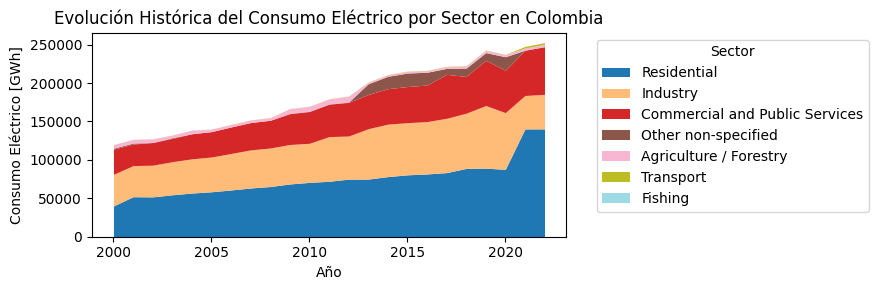

In [ ]:
# @title
# Cargar toda la tabla
query = """
SELECT *
FROM "International Energy Agency - electricity final consumption by sector in Colombia"
"""
df = pd.read_sql_query(query, conn)

# Asegurarse que el campo de a√±o sea entero
df['Year'] = df['Year'].astype(int)

# Ajusta aqu√≠ si el nombre de la columna sector es diferente
sector_column = 'Sector'  # Cambia si tu columna tiene otro nombre

# Agrupar por a√±o y sector
df_grouped = df.groupby(['Year', sector_column])['Value'].sum().reset_index()

# Pivotear para √°rea apilada
df_pivot = df_grouped.pivot(index='Year', columns=sector_column, values='Value').fillna(0)

# Ordenar columnas de mayor a menor consumo total
order = df_pivot.sum().sort_values(ascending=False).index.tolist()
df_pivot = df_pivot[order]

# ‚úÖ Gr√°fico de √°rea apilada
plt.figure(figsize=(9, 3))
df_pivot.plot.area(figsize=(9, 3), linewidth=0, cmap='tab20')

plt.title('Evoluci√≥n Hist√≥rica del Consumo El√©ctrico por Sector en Colombia')
plt.xlabel('A√±o')
plt.ylabel('Consumo El√©ctrico [GWh]')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## EMISIONES DE CO2


In [ ]:
# @title
# üìå 5. Definir nombres exactos de las tablas de emisiones
tabla_sector = 'International Energy Agency - CO2 emissions by sector in Colombia'
tabla_fuel = 'International Energy Agency - CO2 emissions from fuel combustion, Colombia'

# üìå 6. Cargar el contenido detallado de ambas tablas
df_sector_detallado = pd.read_sql_query(f'''
    SELECT
      Year,
      Sector,
      "Value" AS Emissions
    FROM "{tabla_sector}"
    ORDER BY Year, "Sector";
''', conn)


df_fuel_detallado = pd.read_sql_query(f'''
    SELECT Year, "Fuel", "CO2 emissions from fuel combustion, Colombia" AS Emissions
    FROM "{tabla_fuel}"
    ORDER BY Year, "Fuel";
''', conn)


# Convertir Year a string para manejarlo en matplotlib
df_sector_detallado['Year'] = df_sector_detallado['Year'].astype(str)

# üìå 3. Convertir 'Emissions' a num√©rico si es necesario
df_fuel_detallado['Emissions'] = pd.to_numeric(df_fuel_detallado['Emissions'], errors='coerce')

# Crear DataFrame pivotado
pivot_df = df_sector_detallado.pivot_table(
    index='Year',
    columns='Sector',
    values='Emissions',
    aggfunc='sum'
).fillna(0)

# üìå 2. Selector de tipo de gr√°fico
tipo_grafico_selector = widgets.Dropdown(
    options=['L√≠nea', '√Årea No Apilada', '√Årea Apilada'],
    description='Tipo de Gr√°fico:',
    layout=widgets.Layout(width='50%')
)

# üìå 3. Funci√≥n para graficar con Matplotlib seg√∫n l√≠nea, √°rea no apilada, √°rea apilada
def mostrar_grafico(tipo_grafico):
    plt.figure(figsize=(9, 3))

    if tipo_grafico == 'L√≠nea':
        pivot_df.plot(kind='line', marker='o', figsize=(9, 3))
        plt.title('Evoluci√≥n de las Emisiones de CO2 por Sector en Colombia (L√≠nea)')

    elif tipo_grafico == '√Årea No Apilada':
        for column in pivot_df.columns:
            plt.fill_between(pivot_df.index, pivot_df[column], label=column, alpha=0.5)
        plt.title('Evoluci√≥n de las Emisiones de CO2 por Sector en Colombia (√Årea No Apilada)')

    elif tipo_grafico == '√Årea Apilada':
        # üìå Recalcular orden de columnas seg√∫n el total acumulado
        column_order = pivot_df.sum().sort_values(ascending=False).index
        pivot_df_sorted = pivot_df[column_order]

        # üìå Graficar √°rea apilada ordenada
        pivot_df_sorted.plot(kind='area', stacked=True, figsize=(9, 3), alpha=0.7)
        plt.title('Evoluci√≥n de las Emisiones de CO2 por Sector (√Årea Apilada Ordenada)')

    plt.ylabel('Emisiones (MtCO2)')
    plt.xlabel('A√±o')
    plt.xticks(rotation=90)
    plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# üìå 4. Crear la interacci√≥n
widgets.interact(mostrar_grafico, tipo_grafico=tipo_grafico_selector)


# üìå 4. Calcular participaci√≥n porcentual por a√±o y sector en gr√°fico de barras apiladas
df_sector_total = df_sector_detallado.groupby('Year')['Emissions'].sum().reset_index(name='Total_Emissions')
df_sector_porcentual = df_sector_detallado.merge(df_sector_total, on='Year')
df_sector_porcentual['Participation_%'] = (df_sector_porcentual['Emissions'] / df_sector_porcentual['Total_Emissions']) * 100

# üìå 5. Ordenar de mayor a menor participaci√≥n por a√±o
df_sector_porcentual = df_sector_porcentual.sort_values(['Year', 'Participation_%'], ascending=[True, False])

# üìå 6. Pivotear datos
pivot_porcentual = df_sector_porcentual.pivot(index='Year', columns='Sector', values='Participation_%').fillna(0)

# üìå 7. Ordenar columnas de mayor a menor seg√∫n participaci√≥n total acumulada
column_order = pivot_porcentual.sum().sort_values(ascending=False).index
pivot_porcentual = pivot_porcentual[column_order]

interactive(children=(Dropdown(description='Tipo de Gr√°fico:', layout=Layout(width='50%'), options=('L√≠nea', '‚Ä¶

<ipython-input-67-3675573226>:10: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.



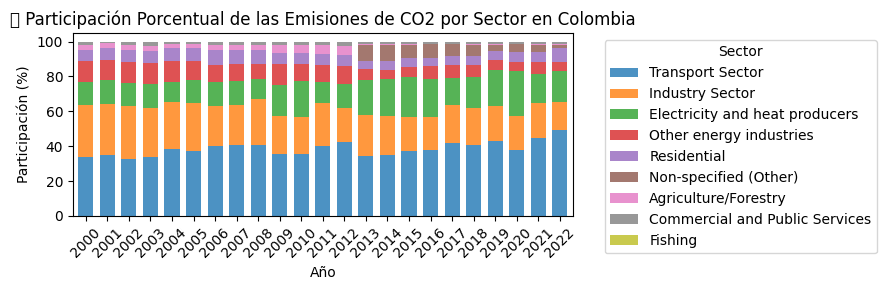

In [ ]:
# @title
# üìå 8. Gr√°fico de barras apiladas ordenadas de mayor a menor
pivot_porcentual.plot(kind='bar', stacked=True, figsize=(9, 3), alpha=0.8, width=0.7)

plt.title('üü¢ Participaci√≥n Porcentual de las Emisiones de CO2 por Sector en Colombia')
plt.ylabel('Participaci√≥n (%)')
plt.xlabel('A√±o')
plt.xticks(rotation=45)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## FACTOR DE CAPACIDAD

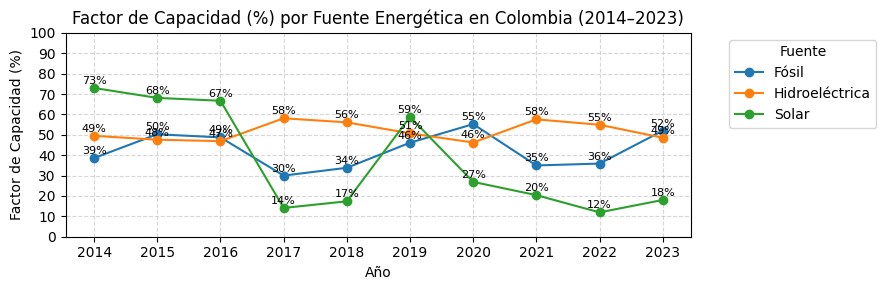

In [ ]:
# @title
import pandas as pd
import numpy as np

# ‚úÖ 1. Cargar generaci√≥n mensual y procesar
query_gen = """
SELECT Time, Product, Value
FROM Monthly_Electricity_Statistics
WHERE Country = 'Colombia'
  AND Balance = 'Net Electricity Production'
  AND Product IN (
    'Hydro',
    'Coal, Peat and Manufactured Gases',
    'Oil and Petroleum Products',
    'Natural Gas',
    'Combustible Renewables',
    'Solar'
  )
  AND Value IS NOT NULL
"""
df_gen = pd.read_sql_query(query_gen, conn)
df_gen["Year"] = df_gen["Time"].str.extract(r'(\d{4})').astype(int)

# ‚úÖ Agrupar fuentes f√≥siles bajo una sola categor√≠a
df_gen["Fuente"] = df_gen["Product"].replace({
    "Coal, Peat and Manufactured Gases": "F√≥sil",
    "Oil and Petroleum Products": "F√≥sil",
    "Natural Gas": "F√≥sil",
    "Hydro": "Hidroel√©ctrica",
    "Combustible Renewables": "Biomasa",
    "Solar": "Solar"
})

# ‚úÖ Agrupar generaci√≥n anual por fuente unificada
df_gen_grouped = df_gen.groupby(["Year", "Fuente"])["Value"].sum().reset_index(name="Generacion_GWh")

# ‚úÖ 2. Cargar capacidad instalada
query_cap = """
SELECT Year, Indicator, Capacity_GW
FROM Global_Electricity_Capacity_Unpivoted
WHERE Country = 'Colombia'
  AND Indicator IN (
    'Hydroelectricity (million kW)',
    'Fossil fuels (million kW)',
    'Combustible Renewables (million kW)',
    'Solar (million kW)'
  )
"""
df_cap = pd.read_sql_query(query_cap, conn)

# ‚úÖ Mapear nombres para coincidir con df_gen_grouped
df_cap["Fuente"] = df_cap["Indicator"].replace({
    "Hydroelectricity (million kW)": "Hidroel√©ctrica",
    "Fossil fuels (million kW)": "F√≥sil",
    "Combustible Renewables (million kW)": "Biomasa",
    "Solar (million kW)": "Solar"
})

# ‚úÖ Filtrar a√±os coincidentes
df_gen_grouped = df_gen_grouped[df_gen_grouped["Year"].between(2014, 2023)]
df_cap = df_cap[df_cap["Year"].between(2014, 2023)]

# ‚úÖ Unir y calcular factor de capacidad
df_fc = pd.merge(df_gen_grouped, df_cap[["Year", "Fuente", "Capacity_GW"]], on=["Year", "Fuente"], how="inner")
df_fc["Factor_Capacidad_%"] = (df_fc["Generacion_GWh"] / (df_fc["Capacity_GW"] * 8760)) * 100
df_fc["Factor_Capacidad_%"] = df_fc["Factor_Capacidad_%"].round(2)

# ‚úÖ Graficar series de tiempo con etiquetas num√©ricas
plt.figure(figsize=(9, 3))
for fuente in df_fc["Fuente"].unique():
    datos = df_fc[df_fc["Fuente"] == fuente]
    plt.plot(datos["Year"], datos["Factor_Capacidad_%"], marker="o", label=fuente)

    # A√±adir etiquetas con valores
    for x, y in zip(datos["Year"], datos["Factor_Capacidad_%"]):
        plt.text(x, y + 1, f"{y:.0f}%", ha='center', va='bottom', fontsize=8)

plt.title("Factor de Capacidad (%) por Fuente Energ√©tica en Colombia (2014‚Äì2023)", fontsize=12)
plt.xlabel("A√±o")
plt.ylabel("Factor de Capacidad (%)")
plt.ylim(0, 100)
plt.xticks(np.arange(2014, 2024, 1))
plt.yticks(np.arange(0, 101, 10))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Fuente", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

